In [1]:
from cgi import test
from lib2to3.pgen2.pgen import DFAState
from lib2to3.refactor import get_all_fix_names
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy
import os
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
from vega_datasets import data
#import data from vega_datasets
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


# Plan
Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the 
change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
#renaming dataset
df = data.sf_temps()

In [3]:
# confirming that the data is from the same year
df.date.dt.year.value_counts()

2010    8759
Name: date, dtype: int64

In [4]:
# pulling the mean of the temperature by days.
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


<AxesSubplot:xlabel='date'>

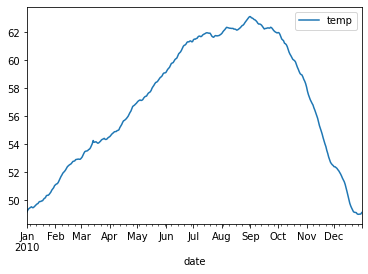

In [5]:
avg_temp = df.resample('D').mean()
avg_temp.plot()

### 2. Write the code necessary to visualize the minimum temperature over time

<AxesSubplot:xlabel='date'>

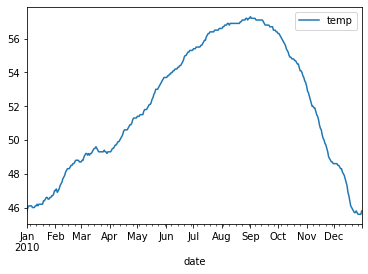

In [6]:
min_temp = df.resample('D').min()
min_temp.plot()

### 3. Write the code necessary to visualize the maximum temperature over time.


<AxesSubplot:xlabel='date'>

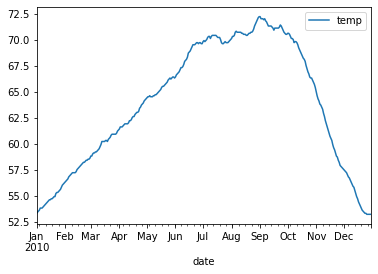

In [7]:
max_temp = df.resample('D').max()
max_temp.plot()

### 4. Which month is the coldest, on average?

In [8]:
coldest_month = df.resample('M').mean()
coldest_month.idxmin()

temp   2010-01-31
dtype: datetime64[ns]

### 5. Which month has the highest average temperature?

In [9]:
highest_month = df.resample('M').mean()
highest_month.idxmax()

temp   2010-09-30
dtype: datetime64[ns]

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [10]:
temp = df.resample('D').agg(['min','max','mean'])
temp['variability'] = temp[('temp','max')]- temp[('temp','min')]
temp.head()

temp                  variability
             min   max       mean            
date                                         
2010-01-01  45.8  53.3  49.170833         7.5
2010-01-02  46.0  53.4  49.304167         7.4
2010-01-03  46.1  53.5  49.391667         7.4
2010-01-04  46.1  53.6  49.445833         7.5
2010-01-05  46.1  53.8  49.491667         7.7

In [11]:
temp.resample('M').mean().variability.idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

- Which month has the highest daily temperature variability?  2010-09-30

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

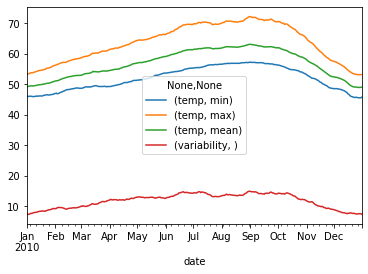

In [12]:
temp.plot()

***

In [13]:
#importing dataset
from vega_datasets import data 
seattle = data.seattle_weather()

In [14]:
# renaming it to df
df = seattle.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?

### Which year and month combination has the highest amount of precipitation?

In [15]:
max_precip_month = df.precipitation.resample('m').mean().nlargest(n=1)
max_precip_month

date
2015-12-31    9.177419
Freq: M, Name: precipitation, dtype: float64

### Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

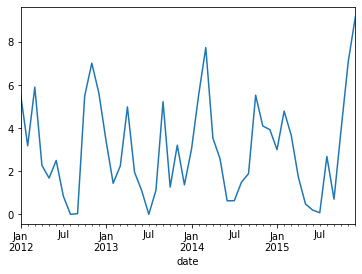

In [16]:
precipitation_by_month = df.precipitation.resample('m').mean()
precipitation_by_month.plot()

### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

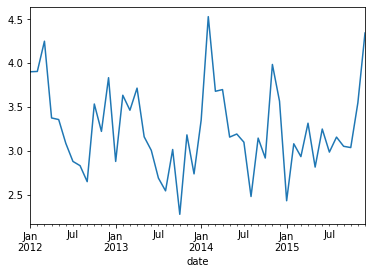

In [17]:
wind_by_month = df.wind.resample('m').mean()
wind_by_month.plot()

### Which year-month combination is the windiest?

In [18]:
windiest = df.wind.resample('m').sum()
windiest.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [19]:
df.weather.str.contains('sun').resample('y').sum().nlargest(1)

date
2014-12-31    211
Freq: A-DEC, Name: weather, dtype: int64

In [20]:
# confirming info.
sunny_days = df[df.weather.str.contains('sun')]
sunny_days

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-11,0.0,6.1,-1.1,5.1,sun
2012-01-12,0.0,6.1,-1.7,1.9,sun
2012-01-13,0.0,5.0,-2.8,1.3,sun
2012-02-02,0.0,8.3,1.7,2.6,sun
...,...,...,...,...,...
2015-12-13,1.3,7.8,6.1,6.1,sun
2015-12-14,0.0,7.8,1.7,1.7,sun
2015-12-26,0.0,4.4,0.0,2.5,sun


In [21]:
#count of sunny days for all the years 
sunny_days.resample('y').count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,118,118,118,118,118
2013-12-31,205,205,205,205,205
2014-12-31,211,211,211,211,211
2015-12-31,180,180,180,180,180


### In which month does it rain the most?

In [22]:
rainy = df[df.weather.str.contains('rain')]
rainy

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...
2015-01-18,21.3,13.9,7.2,6.6,rain
2015-04-01,5.1,12.8,5.6,3.2,rain
2015-08-12,7.6,28.3,16.7,2.7,rain


In [23]:
rainy.resample('m').count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,18,18,18,18,18
2012-02-29,17,17,17,17,17
2012-03-31,19,19,19,19,19
2012-04-30,19,19,19,19,19
2012-05-31,16,16,16,16,16
2012-06-30,19,19,19,19,19
2012-07-31,12,12,12,12,12
2012-08-31,2,2,2,2,2
2012-09-30,4,4,4,4,4


In [24]:
rainy.resample('m').sum().idxmax()

precipitation   2012-11-30
temp_max        2012-06-30
temp_min        2012-06-30
wind            2013-02-28
dtype: datetime64[ns]

In [25]:
rainy_months = rainy.resample('m').sum()

<AxesSubplot:xlabel='date'>

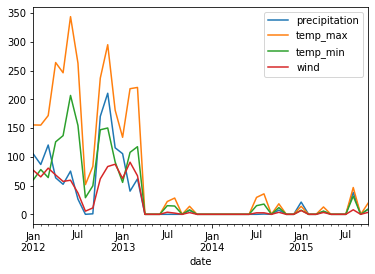

In [26]:
rainy_months.plot()

### takeaways = rainiest month   2012-11-30

***

### Which month has the most number of days with a non-zero amount of precipitation?

In [27]:
precipitation_days = df[df.precipitation > 0]
precipitation_days

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...
2015-12-23,6.1,5.0,2.8,7.6,fog
2015-12-24,2.5,5.6,2.2,4.3,fog
2015-12-25,5.8,5.0,2.2,1.5,fog


In [28]:
#count of precipitation day and max count using idxmax() function 
precipitation_days.resample('m').count().idxmax()

precipitation   2012-12-31
temp_max        2012-12-31
temp_min        2012-12-31
wind            2012-12-31
weather         2012-12-31
dtype: datetime64[ns]

***

### Flight Data
- Convert any negative delays to 0.
- Which hour of the day has the highest average delay?
- Does the day of the week make a difference in the delay amount?
- Does the month make a difference in the delay amount?

In [29]:
# importing data
df = data.flights_20k()
df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


### Convert any negative delays to 0.

In [30]:
#coverting - values to 0
df.delay[df.delay < 0] = 0

In [31]:
df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


### Which hour of the day has the highest average delay?

In [32]:
#converting hrs in to variable called hour
df['hour'] = df.date.dt.hour
df

,date,delay,distance,origin,destination,hour
0,2001-01-13 14:56:00,32,417,SAN,SJC,14
1,2001-01-31 16:40:00,0,1093,FLL,ISP,16
2,2001-02-11 18:39:00,3,293,LBB,DAL,18
3,2001-01-10 21:00:00,0,550,MSY,MCO,21
4,2001-03-30 21:45:00,0,229,STL,IND,21
...,...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK,15
19996,2001-01-19 13:05:00,0,1489,SEA,MCI,13
19997,2001-02-07 11:37:00,0,1848,MCO,PHX,11
19998,2001-02-24 16:50:00,42,443,RDU,BNA,16


In [35]:
df.groupby('hour').delay.mean().sort_values().sort_values().tail()

hour
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

### - hour 3

### Does the day of the week make a difference in the delay amount?

In [41]:
df['weekday'] = df.index.strftime('%w-%a')
df.groupby('weekday').delay.mean().sort_values()

AttributeError: 'RangeIndex' object has no attribute 'strftime'